# The Linearity Assumption

## Introduction

Let's get into the first and possibly most obvious assumption of linear regression: linearity.

## Objectives

You will be able to:

- Describe the linearity assumption of linear regression
- Diagnose issues with linearity using visualizations and statistical tests

## Linearity

At this point this formula should be familiar:

$$ \hat y = \hat\beta_0 + \hat\beta_1 x_1 + \hat\beta_2 x_2 +\ldots + \hat\beta_n x_n $$ 

And so should this type of interpretation of a linear regression coefficient:

> an increase of 1 unit of independent variable $x$ is associated with a change of coefficient $\beta$ in the dependent variable $y$

In both formula and interpretation, we are assuming that it's valid to fit a **straight line** with a given slope and intercept through our independent and dependent variable. This is true for both simple linear regression, where we have a single slope and intercept, and for multiple regression, where we have straight lines in multiple dimensions, each with their own slopes, forming a hyperplane.

***Linear regression will assume that there is a linear relationship and give you coefficient values regardless of whether there is actually a linear relationship*** between the variables. So to ensure the validity of your model, you'll want to investigate linearity.

## Visualizing Linearity

Visualizations are a key component of model diagnostics because they can not only indicate that there is a _problem_ but also can help guide you towards a _solution_.

If a relationship is not linear, you should be thinking of ways that you might try to transform the variables so that the the relationship becomes linear. For example, you might want to apply a log transformation, or a polynomial transformation.

### Simple Linear Regression

Visualizing linearity with a simple linear regression is very straightforward. Simply plot the independent variable on the x-axis and the dependent variable on the y-axis.

For example, here is a plot of synthetic data where we know that the underlying relationship is $y = -5x + 2$ (plus some noise):

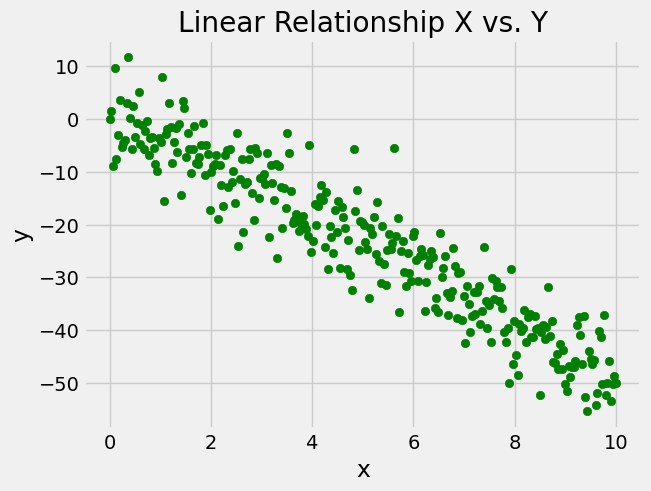

In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('fivethirtyeight')

np.random.seed(2)
x = np.linspace(start=0, stop=10, num=300)
y = -5 * x + 2 + np.random.normal(scale=5, size=300)

fig, ax = plt.subplots()
ax.scatter(x, y, color="green")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Linear Relationship X vs. Y");

The linear relationship between these two axes is very clearly visible!

Compare this to the below plot, which uses `weight` and `mpg` from the Auto MPG dataset:

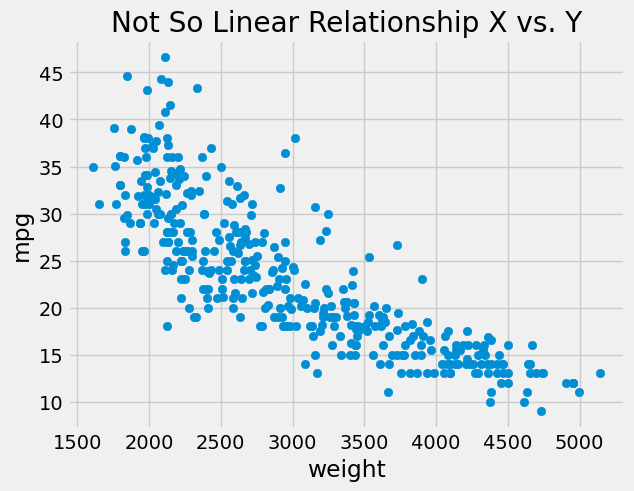

In [2]:
import pandas as pd
import statsmodels.api as sm

data = pd.read_csv("auto-mpg.csv")

y = data["mpg"]
x = data["weight"]

fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set_xlabel("weight")
ax.set_ylabel("mpg")
ax.set_title("Not So Linear Relationship X vs. Y");

Note the curvature in the `weight` x `mpg` plot compared to the plot above. It looks like the slope is steeper for lower values of `weight`, then less steep as `weight` increases. This inconsistent slope is an indication that the relationship might not be linear.

### Multiple Linear Regression

Visualizing linearity in multiple regression is a bit more complicated than with simple regression, because the model you are fitting can't be expressed in a 2D plot.

In fact, using a 2D plot for a multiple regression model can actually make you think that a relationship isn't linear when it actually is!

Let's say the underlying relationship is $y = -5x_1 + 10x_2 + 2$

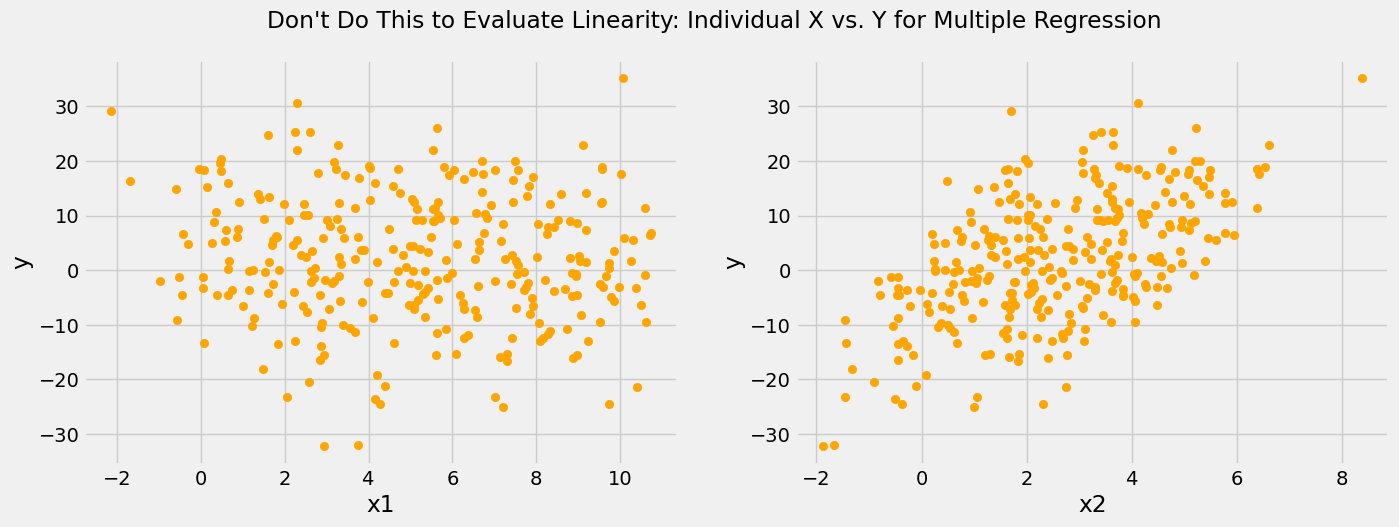

In [3]:
np.random.seed(1)
x1 = np.linspace(start=0, stop=10, num=300) + np.random.normal(size=300)
x2 = np.linspace(start=0, stop=5, num=300) + np.random.normal(size=300)
y = -5 * x1 + 10 * x2 + 2 + np.random.normal(size=300)

fig, axes = plt.subplots(ncols=2, figsize=(15,5))

axes[0].scatter(x1, y, color="orange")
axes[0].set_xlabel("x1")
axes[0].set_ylabel("y")

axes[1].scatter(x2, y, color="orange")
axes[1].set_xlabel("x2")
axes[1].set_ylabel("y")

fig.suptitle("Don't Do This to Evaluate Linearity: Individual X vs. Y for Multiple Regression");

You can somewhat see the linear relationship with `x2`, but `x1` vs. `y` appears to just be a random distribution of points. And yet we know that there is a linear relationship between `x1` and `y`, because we defined the `y` variable ourselves!

The two ways to avoid this issue are **plotting model residuals** and **partial regression plots**. Note that both of these approaches mean that you need to create a model before you can evaluate the linearity of the relationship.

#### Plotting Model Residuals

If the model is correctly specified, then **we should not see curvature in the residuals**. Let's plot the residuals for the $y = -5x_1 + 10x_2 + 2$ data generated in the previous example.

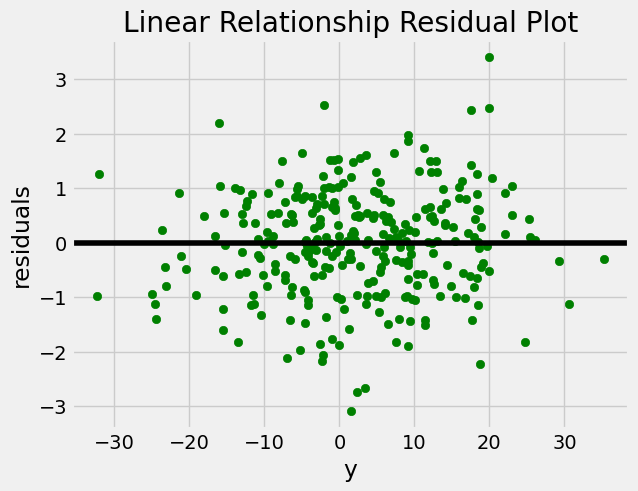

In [4]:
X = pd.DataFrame()
X["x1"] = x1
X["x2"] = x2
linear_model = sm.OLS(y, sm.add_constant(X))
linear_results = linear_model.fit()

fig, ax = plt.subplots()

ax.scatter(y, linear_results.resid, color="green")
ax.axhline(y=0, color="black")
ax.set_xlabel("y")
ax.set_ylabel("residuals")
ax.set_title("Linear Relationship Residual Plot");

By comparison, here is a residual plot for a model that predicts `mpg` using `weight` and `model year`:

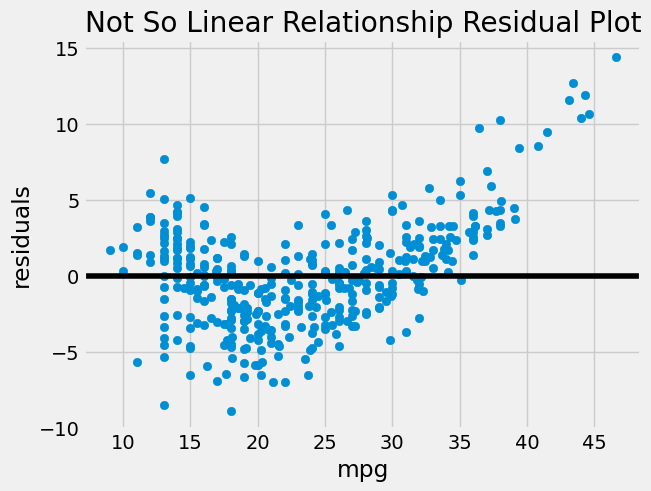

In [5]:
y = data["mpg"]
X = data[["weight", "model year"]]
 
non_linear_model = sm.OLS(y, sm.add_constant(X))
non_linear_results = non_linear_model.fit()

fig, ax = plt.subplots()

ax.scatter(y, non_linear_results.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("mpg")
ax.set_ylabel("residuals")
ax.set_title("Not So Linear Relationship Residual Plot");

You can see curvature in this plot, just like we saw in the simple linear regression using `weight`. Once again this is an indication that something is not linear here.

#### Partial Regression Plots

Partial regression plots dig into each of the individual predictors to see whether the relationship with the target is linear, all else being equal. This tends to be more useful than residual plot for diagnosing the particular problem with the model, although it can mean a lot of plots if your model has a lot of variables.

We are looking for a linear trend in each partial regression plot.

Let's start with the generated data:

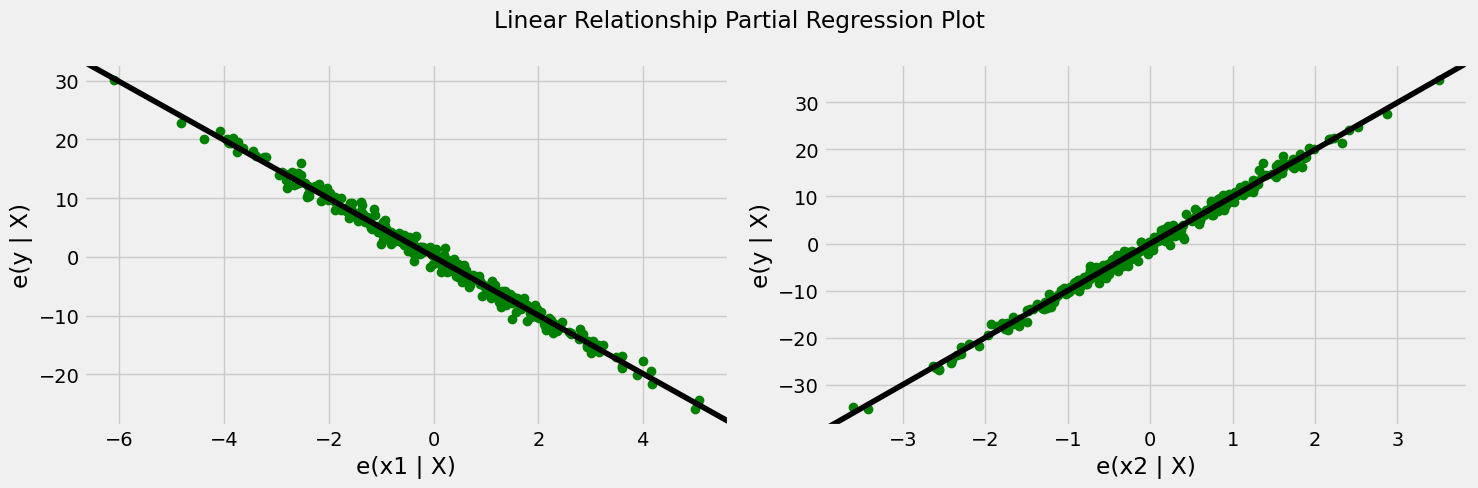

In [6]:
fig = plt.figure(figsize=(15,5))
sm.graphics.plot_partregress_grid(linear_results, exog_idx=["x1", "x2"], fig=fig)

# Customizing plot appearance; note that the StatsModels code actually uses .plot
# with marker 'o', so what looks like a scatter plot is a "line" internally, so
# we access it using .lines rather than .collections
for ax in fig.axes:
    ax.lines[0].set_color("green")
fig.suptitle("Linear Relationship Partial Regression Plot", fontsize="large")

plt.tight_layout()
plt.show()

Compared to when we plotted them individually, now we can clearly see the linear relationships! Let's do the same for the Auto MPG model.

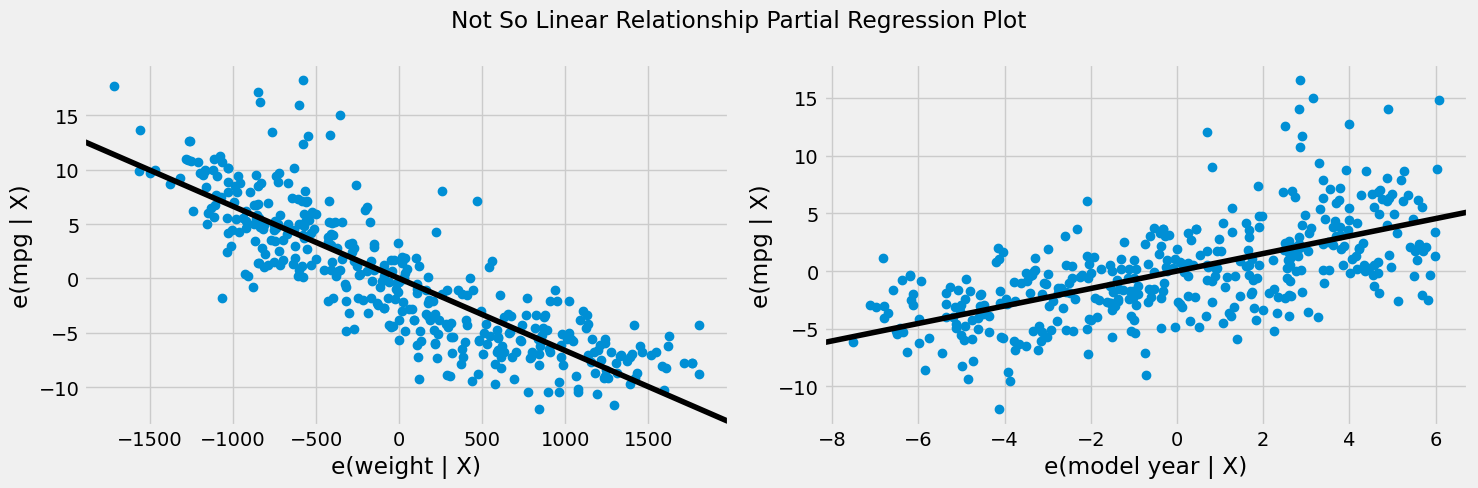

In [7]:
fig = plt.figure(figsize=(15,5))
sm.graphics.plot_partregress_grid(non_linear_results, exog_idx=["weight", "model year"], fig=fig)

fig.suptitle("Not So Linear Relationship Partial Regression Plot", fontsize="large")

plt.tight_layout()
plt.show()

It's a bit harder to see here compared to the residual plot, but there is still some curvature in the plot on the left (partial regression plot for `weight`).

## Statistical Testing for Linearity

Interpreting plots is most helpful if you are looking for clues about how to improve your model, but **statistical tests can help to give you a single overarching answer to the question of whether or not the linearity assumption is being violated**.

For linearity specifically we will use the [rainbow test](https://www.tandfonline.com/doi/abs/10.1080/03610928208828423).

### Rainbow Test Underlying Math

The concept of a rainbow test is that if the relationship is actually linear, then "zooming in" on a subset of the data should not produce a model with a significantly better error rate (residual sum of squares per observation) than the model that uses the full dataset.

$$ \large{ \text{rainbow test statistic} = \frac{(RSS_{full} - RSS_{subset}) \times df_{subset}}{(n_{full} - n_{subset}) \times RSS_{subset}} } $$

In the [StatsModels implementation](https://www.statsmodels.org/stable/generated/statsmodels.stats.diagnostic.linear_rainbow.html), the default portion of the data used is 50%, so we'll walk through an example that uses that. We'll also use the model that we know has a linear relationship.

Selecting a subset of the data:

In [8]:
n = linear_results.nobs

# Taking the middle 50%, so ignoring the first 25% and last 25%
lower_bound = int(np.ceil(n * 0.25))
upper_bound = int(np.floor(n * 0.75))

# Take subsets of y and X
subset_y = linear_model.endog[lower_bound:upper_bound]
subset_X = linear_model.exog[lower_bound:upper_bound]

Building a model with a subset of the data:

In [9]:
subset_model = sm.OLS(subset_y, subset_X)
subset_results = subset_model.fit()

Visualizing the subset (not actually part of the statistical test, but helps to clarify the process):

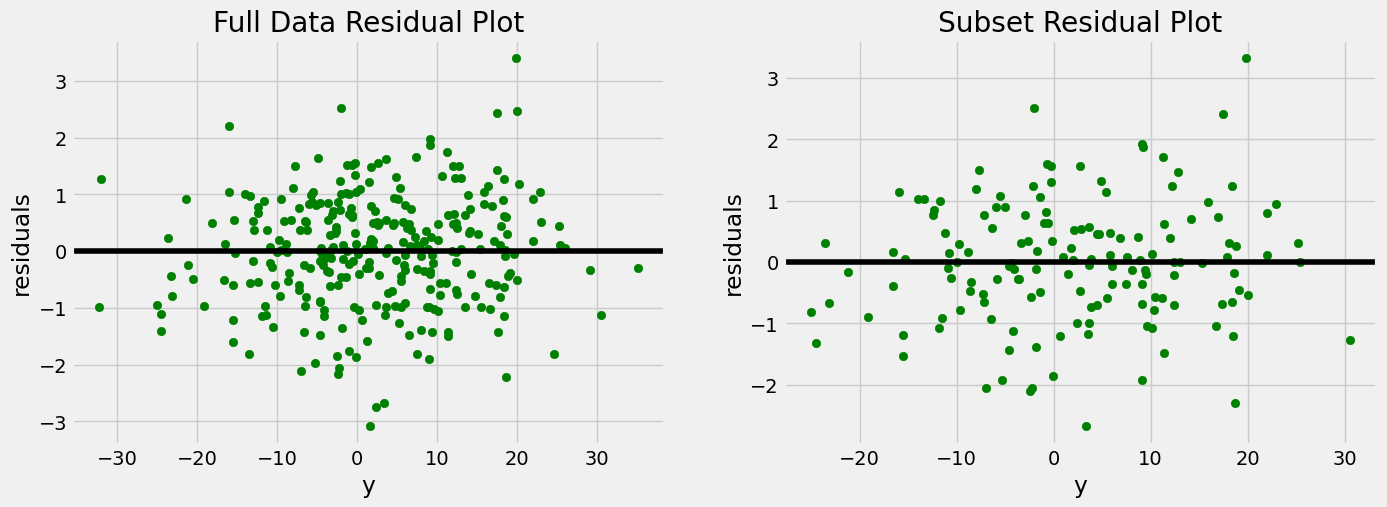

In [10]:
fig, axes = plt.subplots(ncols=2, figsize=(15,5))

axes[0].scatter(linear_model.endog, linear_results.resid, color="green")
axes[0].set_title("Full Data Residual Plot")

axes[1].scatter(subset_y, subset_results.resid, color="green")
axes[1].set_title("Subset Residual Plot")

for ax in axes:
    ax.set_xlabel("y")
    ax.set_ylabel("residuals")
    ax.axhline(y=0, color="black")

So far so good! There are fewer data points for the subset but the difference looks pretty random, not like there is a trend or curve.

Comparing the residual sum of squares to create a statistic:

In [11]:
subset_n = subset_model.nobs

rss = linear_results.ssr
subset_rss = subset_results.ssr

stat = (rss - subset_rss) * subset_results.df_resid / ((n - subset_n) * subset_rss) 
stat

0.8888211560283956

Then finding the p-value for that statistic using the f-distribution survival function:

In [12]:
from scipy import stats
p_value = stats.f.sf(stat, n - subset_n, subset_results.df_resid)
p_value

0.7634250654991752

### Rainbow Test with StatsModels

Fortunately you don't actually need to write out all of that math yourself if you want to apply the rainbow test. Instead you can just use the StatsModels implementation!

`linear_rainbow` is a function that takes an OLS results object and returns a test statistic and a p-value.

Below we demonstrate the same test coded above, this time using StatsModels:

In [13]:
from statsmodels.stats.diagnostic import linear_rainbow
linear_rainbow(linear_results)

(0.8888211560283957, 0.7634250654991752)

And here is the output for our Auto MPG model:

In [14]:
linear_rainbow(non_linear_results)

(1.907684636312535, 4.178078921300679e-06)

### Interpreting Rainbow Test Results

Just like any other statistical test, there is a null hypothesis, and a low enough p-value indicates that we can reject that null hypothesis.

In the case of the rainbow test, **the null hypothesis** is that there is no significant difference between the subset model and the full model, i.e. that **the relationship is linear**.

A sufficiently low p-value means that we reject the null hypothesis, meaning that the relationship is not linear.

For the two models presented above:

* The first model (generated data) has a **p-value of about 0.76**. This is much higher than the standard alpha of 0.05, so we fail to reject the null hypothesis and can **consider the relationship to be linear**
* The second model (Auto MPG data) has a **p-value of about 0.000004**. This is much lower than the standard alpha of 0.05, so we reject the null hypothesis and **do not consider the relationship to be linear**

Note that this is "opposite" of the p-values you are used to looking at for model significance or coefficient significance. A low p-value in the rainbow test is a "bad" outcome, indicating a _problem_ with the model.

## Treating Linearity Issues

If your visualization or statistical test is indicating that your modeled relationship is not actually linear, you should consider transforming the feature and/or target in order to create a linear relationship. This is going to be different for every dataset, but it will always need to be a **non-linear transformation** (e.g. log transformation, adding interaction terms, etc.). A linear transformation (e.g. standardization) will not resolve linearity issues.

## Summary

The linearity assumption for linear regression means the assumption that the target can be predicted using a linear combination of the features. Linearity can be assessed using visualizations such as a residual plot or partial regression plots, as well as with the linear rainbow statistical test.